In [15]:
from pandas import read_csv
import pandas as pd 
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

#DATA MANIPULATION AND CLEANING CELL
series = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', index_col = "Country/Region")
series = series.drop(["Province/State","Lat","Long"], axis=1)
series.index.names = ["Country"]
country = pd.Series(series.index.unique().to_numpy())
series = series.groupby(['Country']).sum()
series = series.T
index = pd.date_range(start='1/22/20', end=series.tail(1).index.item(), freq='d')
series.set_index(index, inplace = True)
print(series)

Country     Afghanistan  Albania  Algeria  Andorra  Angola  \
2020-01-22            0        0        0        0       0   
2020-01-23            0        0        0        0       0   
2020-01-24            0        0        0        0       0   
2020-01-25            0        0        0        0       0   
2020-01-26            0        0        0        0       0   
...                 ...      ...      ...      ...     ...   
2020-04-23         1279      663     3007      723      25   
2020-04-24         1351      678     3127      731      25   
2020-04-25         1463      712     3256      738      25   
2020-04-26         1531      726     3382      738      26   
2020-04-27         1703      736     3517      743      27   

Country     Antigua and Barbuda  Argentina  Armenia  Australia  Austria  ...  \
2020-01-22                    0          0        0          0        0  ...   
2020-01-23                    0          0        0          0        0  ...   
2020-01-24     

2020-04-28    31187.488412
2020-04-29    32867.456448
2020-04-30    34795.641986
2020-05-01    36577.412375
Freq: D, dtype: float64
                             ARIMA Model Results                              
Dep. Variable:               D2.India   No. Observations:                   95
Model:                 ARIMA(9, 2, 1)   Log Likelihood                -602.761
Method:                       css-mle   S.D. of innovations            135.389
Date:                Tue, 28 Apr 2020   AIC                           1229.523
Time:                        10:41:12   BIC                           1260.170
Sample:                    01-24-2020   HQIC                          1241.906
                         - 04-27-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.6091     14.645      1.271      0.204     -10.094

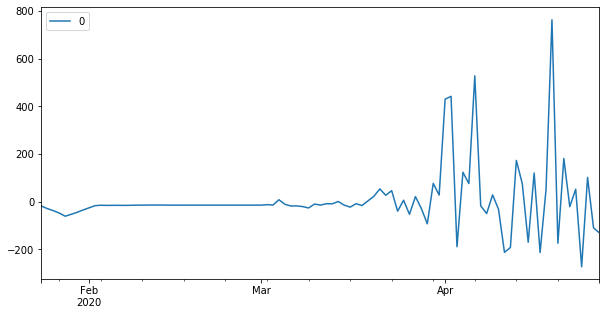

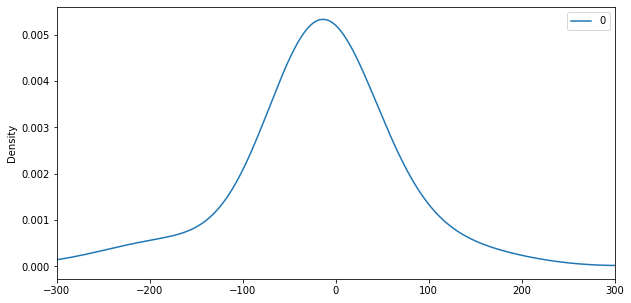

                0
count   95.000000
mean     4.517944
std    136.190366
min   -273.466803
25%    -24.509707
50%    -14.561634
75%      1.990975
max    763.193345


In [20]:
#MODEL IMPLEMENTATION 
model = ARIMA(series.India, order=(9,2,1))
model_fit = model.fit(disp=0)
pre, e, err = model_fit.forecast(steps=4, alpha = .05)
predict = pd.Series(pre, index = pd.date_range(start = series.index.max() + pd.Timedelta(1,unit = 'd'), end = series.index.max()+ pd.Timedelta(4, unit= 'd'), freq = 'd'))
error_lower = pd.Series(err[:,0], index = predict.index)
error_upper = pd.Series(err[:,1], index = predict.index)
print(predict)
print(model_fit.summary())


# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (10,5))
plt.show()
residuals.plot(kind='kde',figsize = (10,5))
axes = plt.gca()
axes.set_xlim([-300,300])
plt.show()
print(residuals.describe())


[[30922.13157639 31452.8452482 ]
 [32509.02020111 33225.89269577]
 [34335.34564676 35255.93832495]
 [36007.37810241 37147.44664696]]


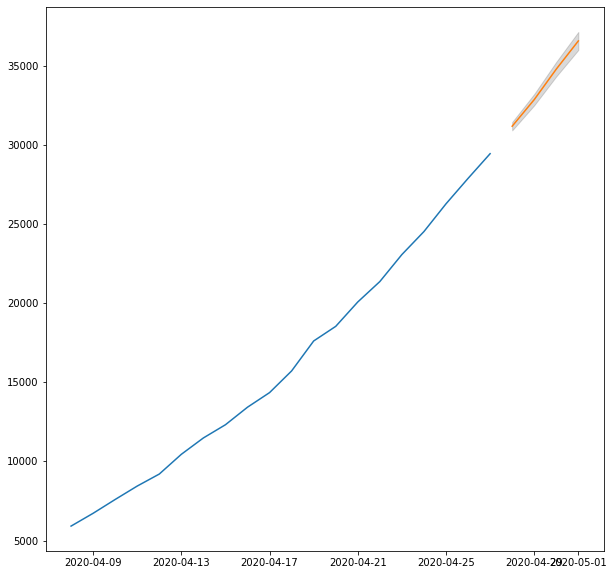

In [22]:
print(err)
#PLOT

plt.figure(figsize=(10,10))
plt.plot(series.India.tail(20))
plt.plot(predict)
plt.fill_between(predict.index, error_lower, error_upper, color='k', alpha=.15)
plt.show()

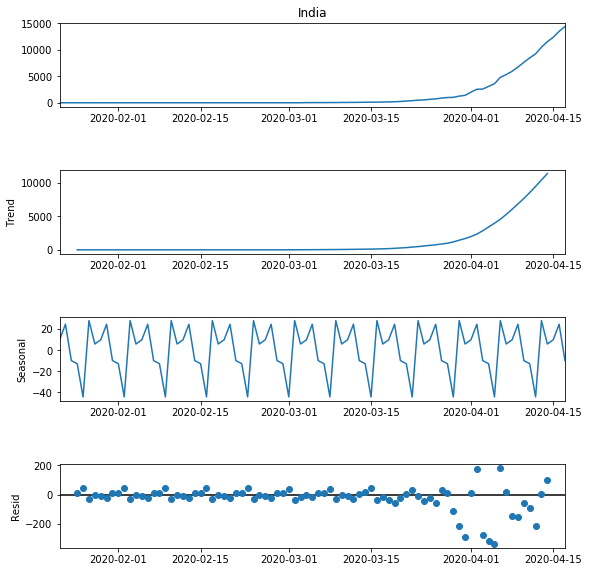

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib 

res = seasonal_decompose(series.India, model='additive')
fig = res.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,9)
plt.show()